In [1]:
%matplotlib inline
import anndata2ri
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib import rcParams

ptSize = 10

In [2]:
robjects.r['load']("intersected_scmix.rda")
rdata_10x = robjects.r['int_sce_sc_10x_qc']
rdata_celseq = robjects.r['int_sce_sc_CELseq2_qc']
rdata_dropseq = robjects.r['int_sce_sc_Dropseq_qc']

# adata2 = anndata2ri.rpy2py(int_sce_sc_10x_qc)
anndata2ri.activate()
adata_10x = r('as(int_sce_sc_10x_qc, "SingleCellExperiment")')
adata_celseq = r('as(int_sce_sc_CELseq2_qc, "SingleCellExperiment")')
adata_dropseq = r('as(int_sce_sc_Dropseq_qc, "SingleCellExperiment")')

Exception ignored from cffi callback <function _consolewrite_ex at 0x000001BDDD0E6550>:
Traceback (most recent call last):
  File "D:\Miniconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "D:\Miniconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 0: invalid continuation byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x000001BDDD0E6550>:
Traceback (most recent call last):
  File "D:\Miniconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "D:\Miniconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen)

In [3]:
adata_10x

AnnData object with n_obs × n_vars = 902 × 13575
    obs: 'unaligned', 'aligned_unmapped', 'mapped_to_exon', 'mapped_to_intron', 'ambiguous_mapping', 'mapped_to_ERCC', 'mapped_to_MT', 'number_of_genes', 'total_count_per_cell', 'non_mt_percent', 'non_ribo_percent', 'outliers', 'cell_line', 'cell_line_demuxlet', 'demuxlet_cls', 'Method'
    uns: 'scPipe', 'Biomart', 'log.exprs.offset'
    layers: 'logcounts'

In [16]:
#### centered and scaled
# dropseq (225, 13575)
# celseq  (274, 13575)
# 10x     (902, 13575)
scaler = StandardScaler() # ddof = 0 Delta Degrees of Freedom

scaler.fit(adata_10x.X)
adata_10x_raw_counts_scale = scaler.transform(adata_10x.X)
scaler.fit(adata_10x.layers['logcounts'])
adata_10x_log_counts_scale = scaler.transform(adata_10x.layers['logcounts'])

scaler.fit(adata_celseq.X)
adata_celseq_raw_counts_scale = scaler.transform(adata_celseq.X)
scaler.fit(adata_celseq.layers['logcounts'])
adata_celseq_log_counts_scale = scaler.transform(adata_celseq.layers['logcounts'])

scaler.fit(adata_dropseq.X)
adata_dropseq_raw_counts_scale = scaler.transform(adata_dropseq.X)
scaler.fit(adata_dropseq.layers['logcounts'])
adata_dropseq_log_counts_scale = scaler.transform(adata_dropseq.layers['logcounts'])

adata_raw_counts_scale = np.vstack((adata_dropseq_raw_counts_scale, adata_celseq_raw_counts_scale, adata_10x_raw_counts_scale))
adata_log_counts_scale = np.vstack((adata_dropseq_log_counts_scale, adata_celseq_log_counts_scale, adata_10x_log_counts_scale))

u_raw, s_raw, vh_raw = svd(adata_raw_counts_scale)
u_log, s_log, vh_log = svd(adata_log_counts_scale)

Text(0.5, 1.0, 'Scaled and centered')

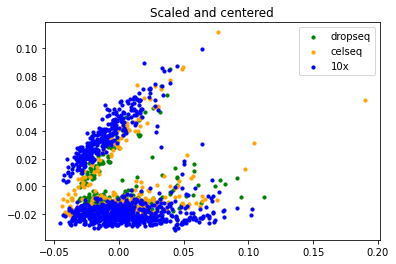

In [20]:
plt.scatter(u_raw[0:225,0],u_raw[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_raw[225:499,0],u_raw[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_raw[499:1401,0],u_raw[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Scaled and centered')

Text(0.5, 1.0, 'Scaled and centered')

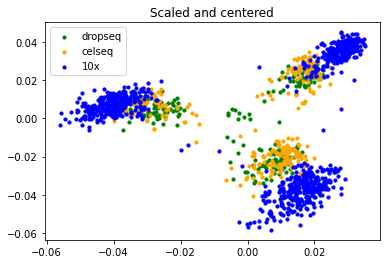

In [28]:
plt.scatter(u_log[0:225,0],u_log[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_log[225:499,0],u_log[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_log[499:1401,0],u_log[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Scaled and centered')

Text(0.5, 0.98, 'Centered and scaled')

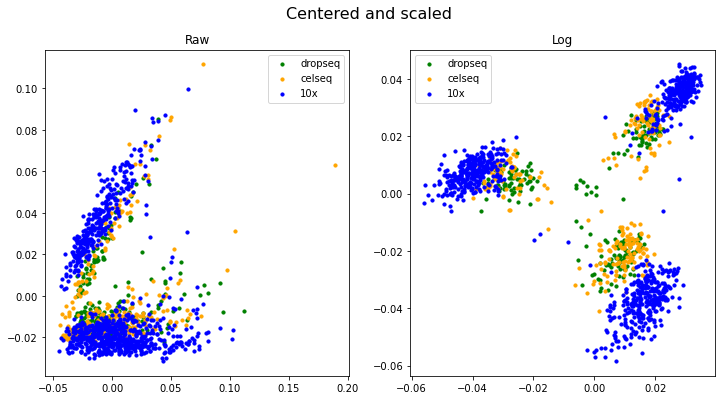

In [44]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].scatter(u_raw[0:225,0],u_raw[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[0].scatter(u_raw[225:499,0],u_raw[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[0].scatter(u_raw[499:1401,0],u_raw[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[0].legend()
ax[0].set_title('Raw')
#plt.show()
ax[1].scatter(u_log[0:225,0],u_log[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[1].scatter(u_log[225:499,0],u_log[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[1].scatter(u_log[499:1401,0],u_log[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[1].legend()
ax[1].set_title('Log')
#plt.show()
plt.suptitle('Centered and scaled', fontsize=16)

In [8]:
adata_log_counts_scale[:,0]

array([-0.57060796, -0.57060796,  0.0084636 , ...,  0.83108219,
        0.03869178,  0.2709669 ])

In [22]:
#### no preprocessing
adata_raw_counts = np.vstack((adata_dropseq.X, adata_celseq.X, adata_10x.X))
adata_log_counts = np.vstack((adata_dropseq.layers['logcounts'], adata_celseq.layers['logcounts'], adata_10x.layers['logcounts']))

u_raw1, s_raw1, vh_raw1 = svd(adata_raw_counts)
u_log1, s_log1, vh_log1 = svd(adata_log_counts)

Text(0.5, 1.0, 'No preprocessing')

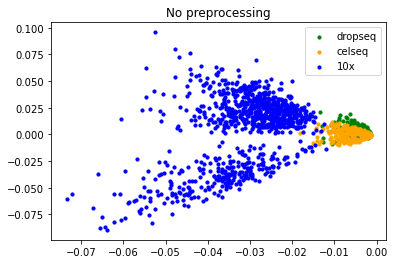

In [23]:
plt.scatter(u_raw1[0:225,0],u_raw1[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_raw1[225:499,0],u_raw1[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_raw1[499:1401,0],u_raw1[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('No preprocessing')

Text(0.5, 1.0, 'No preprocessing')

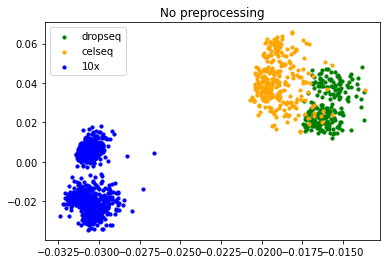

In [24]:
plt.scatter(u_log1[0:225,0],u_log1[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_log1[225:499,0],u_log1[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_log1[499:1401,0],u_log1[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('No preprocessing')

Text(0.5, 0.98, 'No preprocessing')

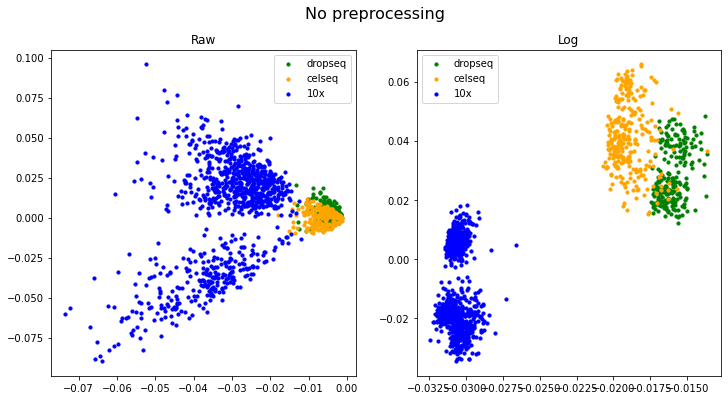

In [45]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].scatter(u_raw1[0:225,0],u_raw1[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[0].scatter(u_raw1[225:499,0],u_raw1[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[0].scatter(u_raw1[499:1401,0],u_raw1[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[0].legend()
ax[0].set_title('Raw')
#plt.show()
ax[1].scatter(u_log1[0:225,0],u_log1[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[1].scatter(u_log1[225:499,0],u_log1[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[1].scatter(u_log1[499:1401,0],u_log1[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[1].legend()
ax[1].set_title('Log')
#plt.show()
plt.suptitle('No preprocessing', fontsize=16)

In [20]:
u_raw1[0:10,0]

array([-0.01335512, -0.01297397, -0.01258481, -0.01267252, -0.01074242,
       -0.00948469, -0.01017936, -0.00802007, -0.00870943, -0.01064776],
      dtype=float32)

In [25]:
#### centered not scaled
scaler = StandardScaler(with_std=False)

scaler.fit(adata_10x.X)
adata_10x_raw_counts_centre = scaler.transform(adata_10x.X)
scaler.fit(adata_10x.layers['logcounts'])
adata_10x_log_counts_centre = scaler.transform(adata_10x.layers['logcounts'])

scaler.fit(adata_celseq.X)
adata_celseq_raw_counts_centre = scaler.transform(adata_celseq.X)
scaler.fit(adata_celseq.layers['logcounts'])
adata_celseq_log_counts_centre = scaler.transform(adata_celseq.layers['logcounts'])

scaler.fit(adata_dropseq.X)
adata_dropseq_raw_counts_centre = scaler.transform(adata_dropseq.X)
scaler.fit(adata_dropseq.layers['logcounts'])
adata_dropseq_log_counts_centre = scaler.transform(adata_dropseq.layers['logcounts'])

adata_raw_counts_centre = np.vstack((adata_dropseq_raw_counts_centre, adata_celseq_raw_counts_centre, adata_10x_raw_counts_centre))
adata_log_counts_centre = np.vstack((adata_dropseq_log_counts_centre, adata_celseq_log_counts_centre, adata_10x_log_counts_centre))

u_raw2, s_raw2, vh_raw2 = svd(adata_raw_counts_centre)
u_log2, s_log2, vh_log2 = svd(adata_log_counts_centre)

Text(0.5, 1.0, 'Centered not scaled')

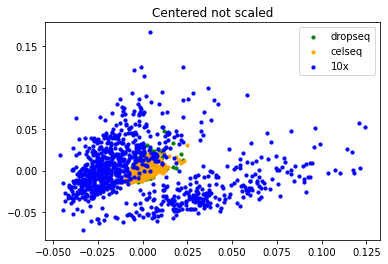

In [26]:
plt.scatter(u_raw2[0:225,0],u_raw2[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_raw2[225:499,0],u_raw2[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_raw2[499:1401,0],u_raw2[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Centered not scaled')

Text(0.5, 1.0, 'Centered not scaled')

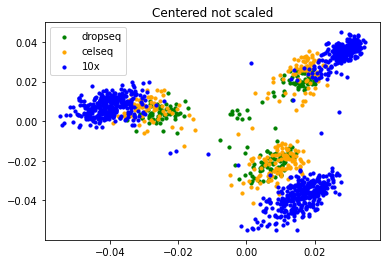

In [27]:
plt.scatter(u_log2[0:225,0],u_log2[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_log2[225:499,0],u_log2[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_log2[499:1401,0],u_log2[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Centered not scaled')

Text(0.5, 0.98, 'Centered not scaled')

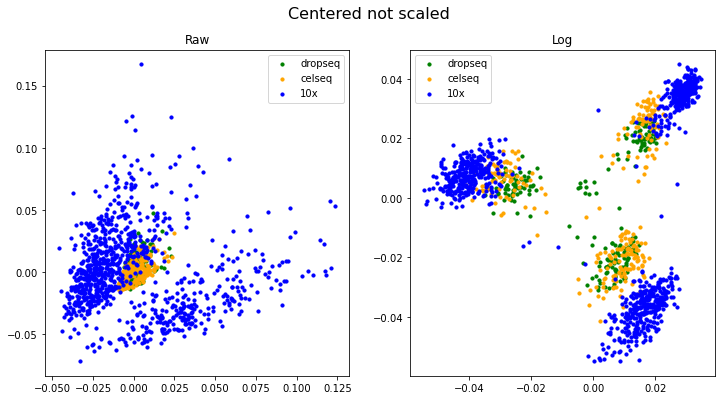

In [47]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].scatter(u_raw2[0:225,0],u_raw2[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[0].scatter(u_raw2[225:499,0],u_raw2[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[0].scatter(u_raw2[499:1401,0],u_raw2[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[0].legend()
ax[0].set_title('Raw')
#plt.show()
ax[1].scatter(u_log2[0:225,0],u_log2[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[1].scatter(u_log2[225:499,0],u_log2[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[1].scatter(u_log2[499:1401,0],u_log2[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[1].legend()
ax[1].set_title('Log')
#plt.show()
plt.suptitle('Centered not scaled', fontsize=16)

In [8]:
#### scaled not centered
scaler = StandardScaler(with_mean=False)

scaler.fit(adata_10x.X)
adata_10x_raw_counts_s = scaler.transform(adata_10x.X)
scaler.fit(adata_10x.layers['logcounts'])
adata_10x_log_counts_s = scaler.transform(adata_10x.layers['logcounts'])

scaler.fit(adata_celseq.X)
adata_celseq_raw_counts_s = scaler.transform(adata_celseq.X)
scaler.fit(adata_celseq.layers['logcounts'])
adata_celseq_log_counts_s = scaler.transform(adata_celseq.layers['logcounts'])

scaler.fit(adata_dropseq.X)
adata_dropseq_raw_counts_s = scaler.transform(adata_dropseq.X)
scaler.fit(adata_dropseq.layers['logcounts'])
adata_dropseq_log_counts_s = scaler.transform(adata_dropseq.layers['logcounts'])

adata_raw_counts_s = np.vstack((adata_dropseq_raw_counts_s, adata_celseq_raw_counts_s, adata_10x_raw_counts_s))
adata_log_counts_s = np.vstack((adata_dropseq_log_counts_s, adata_celseq_log_counts_s, adata_10x_log_counts_s))

u_raw3, s_raw3, vh_raw3 = svd(adata_raw_counts_s)
u_log3, s_log3, vh_log3 = svd(adata_log_counts_s)

Text(0.5, 1.0, 'Scaled not centered')

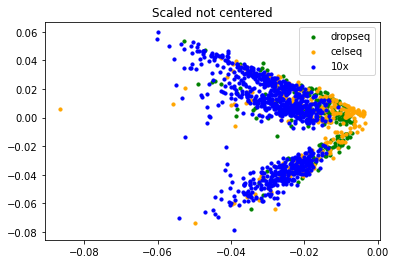

In [15]:
plt.scatter(u_raw3[0:225,0],u_raw3[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_raw3[225:499,0],u_raw3[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_raw3[499:1401,0],u_raw3[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Scaled not centered')

Text(0.5, 1.0, 'Scaled not centered')

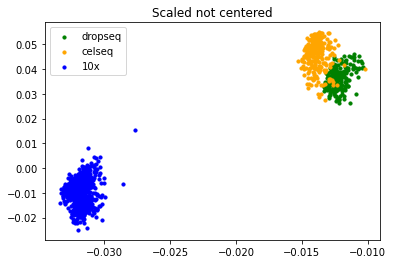

In [14]:
plt.scatter(u_log3[0:225,0],u_log3[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
plt.scatter(u_log3[225:499,0],u_log3[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
plt.scatter(u_log3[499:1401,0],u_log3[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
plt.legend()
plt.title('Scaled not centered')

Text(0.5, 0.98, 'Scaled not centered')

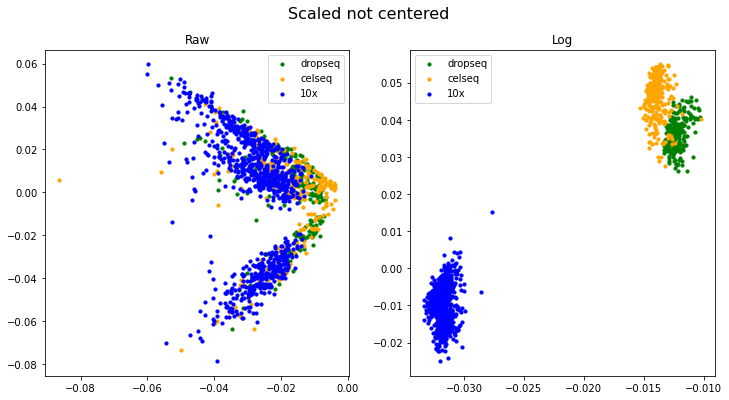

In [48]:
fig, ax = plt.subplots(1,2,figsize=(12, 6))
ax[0].scatter(u_raw3[0:225,0],u_raw3[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[0].scatter(u_raw3[225:499,0],u_raw3[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[0].scatter(u_raw3[499:1401,0],u_raw3[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[0].legend()
ax[0].set_title('Raw')
#plt.show()
ax[1].scatter(u_log3[0:225,0],u_log3[0:225,1], c='green', s = ptSize,label='dropseq') # dropseq
ax[1].scatter(u_log3[225:499,0],u_log3[225:499,1], c='orange', s = ptSize,label='celseq') # celseq
ax[1].scatter(u_log3[499:1401,0],u_log3[499:1401,1], c='blue', s = ptSize,label='10x') # 10x
ax[1].legend()
ax[1].set_title('Log')
#plt.show()
plt.suptitle('Scaled not centered', fontsize=16)